In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

import seaborn as sns

from pandas.plotting import scatter_matrix

# Set print options.

np.set_printoptions(precision = 3)

plt.style.use("ggplot") # Grammar of Graphics Theme

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

# plot inline
%matplotlib inline


from supervised_learning import SupervisedLearning
from feature_engineering import create_all_features
from performance_metrics import compute_performance_metrics

# Part 1: Passive buy and hold returns (For full period)

In [2]:
# global variables

start_date = "2006-11-01"
end_date   = "2025-11-13"  # end is *exclusive*, so this covers up to 2025-11-12
starting_capital = 100_000.0

In [3]:
spy =\
(
    yf.
    download(
        "^GSPC",
        start = start_date,
        end = end_date
    )
)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
spy

Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2006-11-01,1367.810059,1381.949951,1366.260010,1377.760010,2821160000
2006-11-02,1367.339966,1368.390015,1362.209961,1367.439941,2646180000
2006-11-03,1364.300049,1371.680054,1360.979980,1367.310059,2419730000
2006-11-06,1379.780029,1381.400024,1364.270020,1364.270020,2533550000
2006-11-07,1382.839966,1388.189941,1379.189941,1379.750000,2636390000
...,...,...,...,...,...
2025-11-06,6720.319824,6796.680176,6707.509766,6787.589844,6051900000
2025-11-07,6728.799805,6730.109863,6631.439941,6696.180176,5926070000


In [5]:
spy.columns =\
(
    spy
    .columns
    .droplevel(1) # level 0 --> Price; level 1 --> Ticker
)

spy

Price,Close,High,Low,Open,Volume
Date,,,,,
2006-11-01,1367.810059,1381.949951,1366.260010,1377.760010,2821160000
2006-11-02,1367.339966,1368.390015,1362.209961,1367.439941,2646180000
2006-11-03,1364.300049,1371.680054,1360.979980,1367.310059,2419730000
2006-11-06,1379.780029,1381.400024,1364.270020,1364.270020,2533550000
2006-11-07,1382.839966,1388.189941,1379.189941,1379.750000,2636390000
...,...,...,...,...,...
2025-11-06,6720.319824,6796.680176,6707.509766,6787.589844,6051900000
2025-11-07,6728.799805,6730.109863,6631.439941,6696.180176,5926070000
2025-11-10,6832.430176,6841.319824,6770.560059,6785.359863,5366050000


In [6]:
(
    spy
    .isna()
    .sum()
)

Price
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

<Axes: xlabel='Date'>

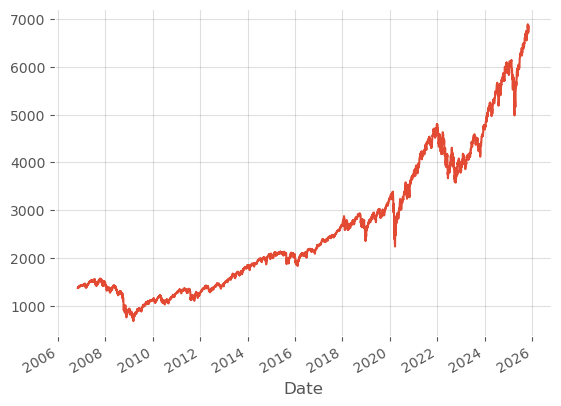

In [7]:
(
    spy['Close']
).plot()

# Part 2: Machine Learning

In [8]:
return_period = 1

## Y Variable - 1 day log return

In [9]:
Y =\
(
    np
    .log(spy['Close']
        )
    .diff(return_period)
    .shift(-return_period)
)

Y.name = 'SPY_pred'

Y

Date
2006-11-01   -0.000344
2006-11-02   -0.002226
2006-11-03    0.011283
2006-11-06    0.002215
2006-11-07    0.002081
                ...   
2025-11-06    0.001261
2025-11-07    0.015284
2025-11-10    0.002073
2025-11-11    0.000629
2025-11-12         NaN
Name: SPY_pred, Length: 4788, dtype: float64

# Features

1. Lagged returns

2. Volatility

3. Simple moving average

4. Exponential moving averages

5. RSI

6. Stochastic Oscillator

7. Rate of Change

8. Average True Range

In [10]:
spy

Price,Close,High,Low,Open,Volume
Date,,,,,
2006-11-01,1367.810059,1381.949951,1366.260010,1377.760010,2821160000
2006-11-02,1367.339966,1368.390015,1362.209961,1367.439941,2646180000
2006-11-03,1364.300049,1371.680054,1360.979980,1367.310059,2419730000
2006-11-06,1379.780029,1381.400024,1364.270020,1364.270020,2533550000
2006-11-07,1382.839966,1388.189941,1379.189941,1379.750000,2636390000
...,...,...,...,...,...
2025-11-06,6720.319824,6796.680176,6707.509766,6787.589844,6051900000
2025-11-07,6728.799805,6730.109863,6631.439941,6696.180176,5926070000
2025-11-10,6832.430176,6841.319824,6770.560059,6785.359863,5366050000


In [11]:
lag_periods = [i for i in range(1,11)]
vol_periods = [5,10,20,60,120]
sma_periods = [63]
ema_periods = [10,30]
rsi_periods = [10,30]
stok_periods = [30]
stod_periods = [30]
roc_periods = [30]
atr_periods = [5, 14, 21]


X = create_all_features(
    spy,
    price_column='Close',
    lagged_return_periods=lag_periods,
    vol_periods=vol_periods,
    sma_periods=sma_periods,
    ema_periods=ema_periods,
    rsi_periods=rsi_periods,
    stok_periods=stok_periods,
    stod_periods=stod_periods,
    roc_periods=roc_periods,
    atr_periods=atr_periods
)

X

,1DT,2DT,3DT,4DT,5DT,6DT,7DT,8DT,9DT,10DT,...,EMA10,EMA30,RSI10,RSI30,%K30,%D30,ROC30,ATR5,ATR14,ATR21
Date,,,,,,,,,,,,,,,,,,,,,
2006-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1367.810059,1367.810059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-02,-0.000344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1367.724587,1367.779730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-03,-0.002226,-0.002569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1367.101944,1367.555234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-06,0.011283,0.009057,0.008713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1369.407050,1368.343931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-07,0.002215,0.013498,0.011272,0.010928,NaN,NaN,NaN,NaN,NaN,NaN,...,1371.849399,1369.279159,NaN,NaN,NaN,NaN,NaN,11.740015,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-06,-0.011241,-0.007594,-0.019400,-0.017681,-0.015067,-0.025021,-0.025065,-0.022779,-0.010564,-0.002693,...,6789.225371,6731.548794,47.876348,54.873023,45.876180,57.349299,1.153267,73.542090,67.680734,83.421015
2025-11-07,0.001261,-0.009980,-0.006333,-0.018139,-0.016420,-0.013806,-0.023760,-0.023803,-0.021518,-0.009303,...,6778.238905,6731.371440,41.808905,53.669848,48.170795,53.493363,1.014678,80.294043,68.989990,85.814337
2025-11-10,0.015284,0.016545,0.005304,0.008950,-0.002856,-0.001137,0.001478,-0.008476,-0.008520,-0.006235,...,6788.091863,6737.891358,44.792050,56.820149,76.212346,56.753107,2.152517,90.458105,74.874965,81.095285


In [12]:
X.columns

Index(['1DT', '2DT', '3DT', '4DT', '5DT', '6DT', '7DT', '8DT', '9DT', '10DT',
       'VOL5', 'VOL10', 'VOL20', 'VOL60', 'VOL120', 'SMA63', 'EMA10', 'EMA30',
       'RSI10', 'RSI30', '%K30', '%D30', 'ROC30', 'ATR5', 'ATR14', 'ATR21'],
      dtype='object')

In [13]:
(   
    X
    .isna()
    .sum()
)

1DT         1
2DT         2
3DT         3
4DT         4
5DT         5
6DT         6
7DT         7
8DT         8
9DT         9
10DT       10
VOL5        4
VOL10       9
VOL20      19
VOL60      59
VOL120    119
SMA63      62
EMA10       0
EMA30       0
RSI10       9
RSI30      29
%K30       29
%D30       31
ROC30      29
ATR5        4
ATR14      13
ATR21      20
dtype: int64

In [14]:
data =\
(
    pd
    .concat([Y, X],
            axis = 1)
    .dropna()
)

In [15]:
data.shape

(4668, 27)

In [16]:
Y =\
(
    data
    .loc[ : , Y.name]
)

Y

Date
2007-04-26   -0.000121
2007-04-27   -0.007862
2007-04-30    0.002648
2007-05-01    0.006452
2007-05-02    0.004316
                ...   
2025-11-05   -0.011241
2025-11-06    0.001261
2025-11-07    0.015284
2025-11-10    0.002073
2025-11-11    0.000629
Name: SPY_pred, Length: 4668, dtype: float64

In [17]:
X =\
(
    data
    .loc[ : , X.columns]
)

X

,1DT,2DT,3DT,4DT,5DT,6DT,7DT,8DT,9DT,10DT,...,EMA10,EMA30,RSI10,RSI30,%K30,%D30,ROC30,ATR5,ATR14,ATR21
Date,,,,,,,,,,,,,,,,,,,,,
2007-04-26,-0.000783,0.009305,0.008954,0.006647,0.015866,0.014663,0.015356,0.017499,0.028097,0.031579,...,1477.135789,1452.873243,88.637600,77.346886,96.704241,96.739894,7.323956,10.883984,10.156407,10.891886
2007-04-27,-0.000121,-0.000903,0.009185,0.008834,0.006527,0.015745,0.014542,0.015235,0.017378,0.027977,...,1480.214727,1455.531095,87.297910,76.647361,96.546837,97.456283,7.723422,9.803955,10.429975,10.611404
2007-04-30,-0.007862,-0.007982,-0.008765,0.001323,0.000972,-0.001335,0.007883,0.006681,0.007373,0.009516,...,1480.606594,1457.262637,63.685817,74.385376,85.909773,93.053617,5.727995,11.351953,11.153547,10.701881
2007-05-01,0.002648,-0.005214,-0.005335,-0.006117,0.003971,0.003620,0.001313,0.010531,0.009328,0.010021,...,1481.641768,1459.136018,64.205398,72.749884,87.957293,90.137968,5.341128,11.449976,11.034267,10.237601
2007-05-02,0.006452,0.009099,0.001238,0.001117,0.000334,0.010422,0.010071,0.007764,0.016983,0.015780,...,1484.237818,1461.509181,69.229114,72.779200,96.474575,90.113880,4.242391,10.781982,10.952837,10.420933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-05,0.003647,-0.008159,-0.006440,-0.003826,-0.013780,-0.013823,-0.011538,0.000677,0.008548,0.014359,...,6804.537715,6732.323206,62.385438,56.859376,66.433114,69.223814,2.900499,69.687988,66.677141,81.129581
2025-11-06,-0.011241,-0.007594,-0.019400,-0.017681,-0.015067,-0.025021,-0.025065,-0.022779,-0.010564,-0.002693,...,6789.225371,6731.548794,47.876348,54.873023,45.876180,57.349299,1.153267,73.542090,67.680734,83.421015
2025-11-07,0.001261,-0.009980,-0.006333,-0.018139,-0.016420,-0.013806,-0.023760,-0.023803,-0.021518,-0.009303,...,6778.238905,6731.371440,41.808905,53.669848,48.170795,53.493363,1.014678,80.294043,68.989990,85.814337


In [18]:
correlation =\
(
    data
    .corr()
)

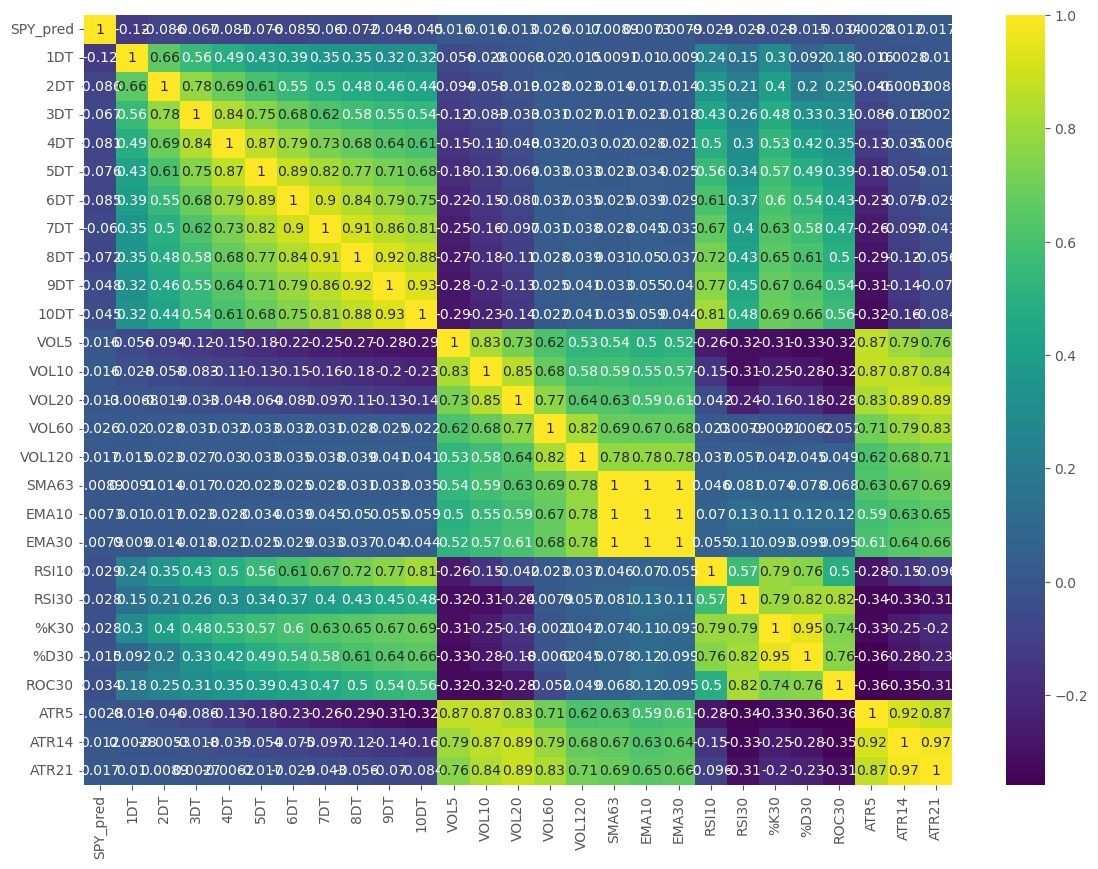

In [19]:

plt.figure(figsize=(14, 10))  # ← adjust size here

(
    sns
    .heatmap(correlation,
             cmap = "viridis",
             annot = True)
)

plt.show()

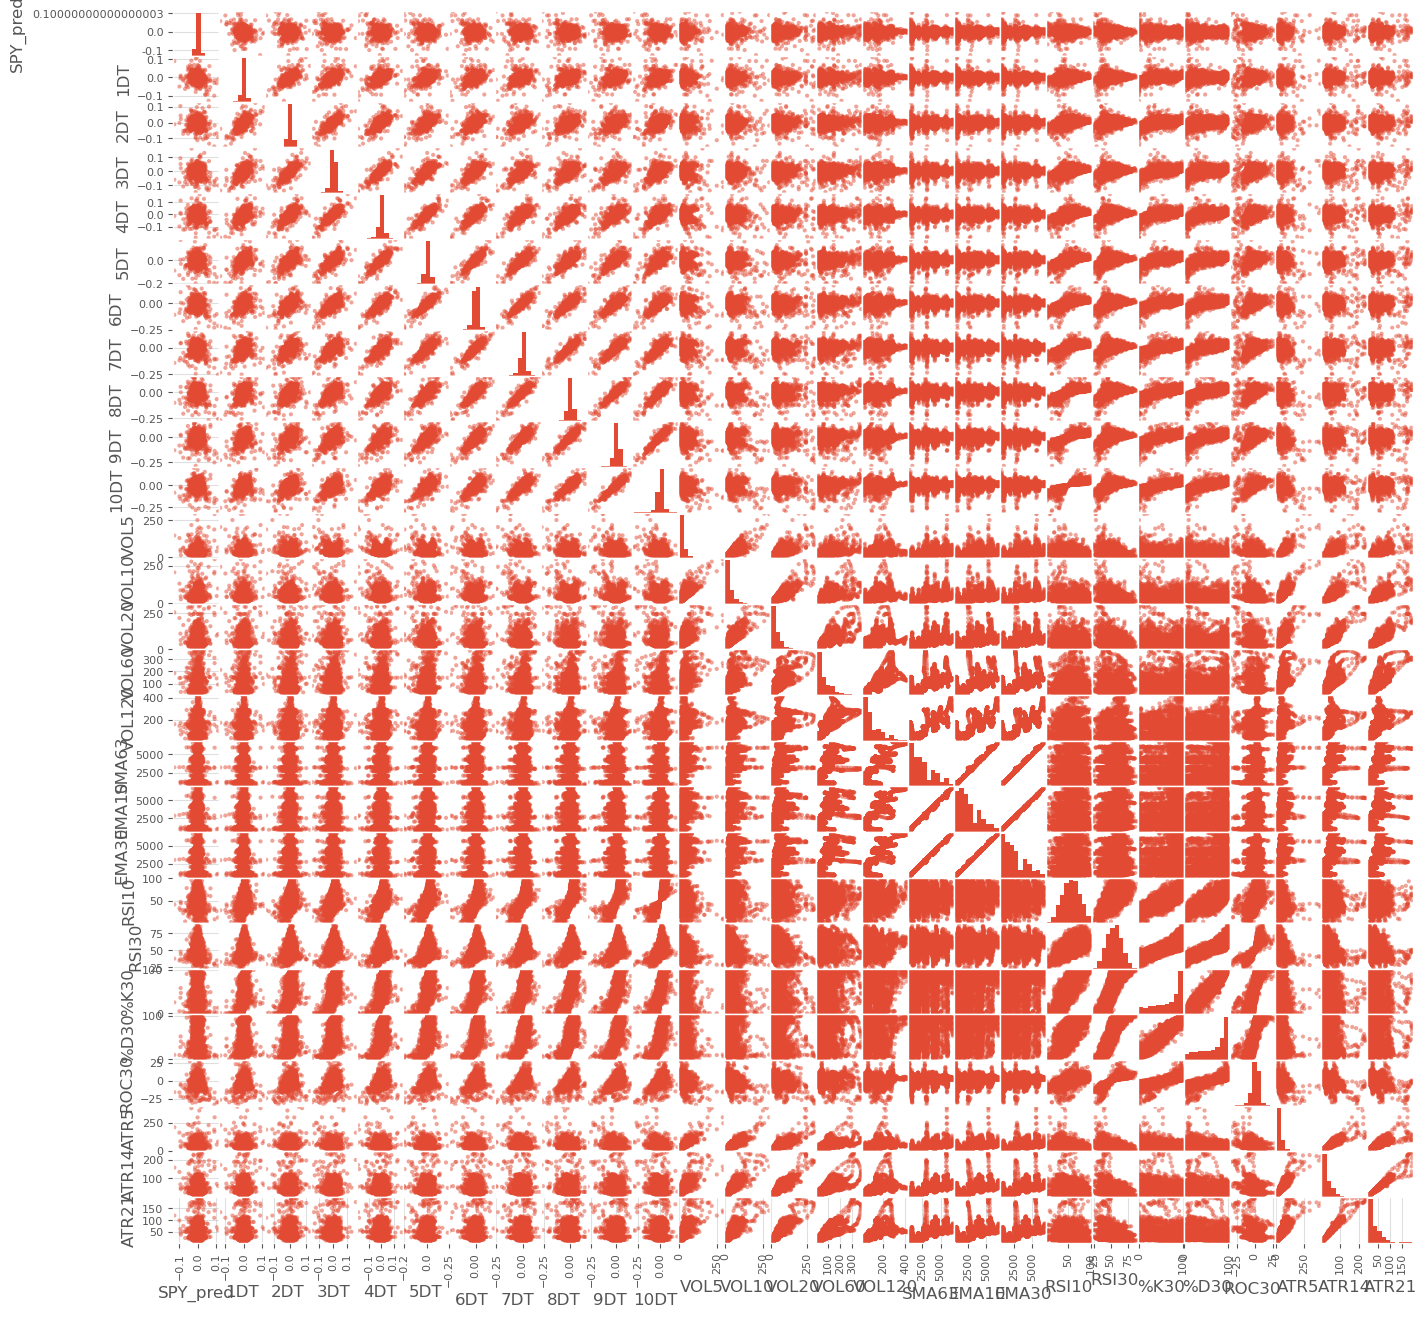

In [20]:
scatter_matrix(data,
               figsize = [16,16]
              )

plt.show()

In [21]:
SL =\
(
    SupervisedLearning()
)

In [22]:
X_train, X_test, Y_train, Y_test =\
(
    SL
    .sequential_split(X,Y,train_frac=0.75)
    
)

Sequential Split: 3501 train / 1167 test samples


In [23]:
seed = 2025
num_folds = 10

metric = "neg_mean_squared_error"

In [24]:
results =\
(
    SL
    .run_all_models(
        X_train = X_train,
        Y_train = Y_train,
        X_test = X_test,
        Y_test = Y_test,
        num_folds = num_folds,
        seed = seed,
        metric = metric
    )
)

LR: CV_Mean=0.0002, CV_Std=0.0000, Train_MSE=0.0002, Test_MSE=0.0001
LASSO: CV_Mean=0.0002, CV_Std=0.0000, Train_MSE=0.0002, Test_MSE=0.0001
Elastic Net Penalty: CV_Mean=0.0002, CV_Std=0.0000, Train_MSE=0.0002, Test_MSE=0.0001
Decision Tree: CV_Mean=0.0004, CV_Std=0.0001, Train_MSE=0.0000, Test_MSE=0.0004
Random Forest: CV_Mean=0.0002, CV_Std=0.0000, Train_MSE=0.0000, Test_MSE=0.0002
Extra Trees: CV_Mean=0.0002, CV_Std=0.0000, Train_MSE=0.0000, Test_MSE=0.0002
Gradient Boosting: CV_Mean=0.0002, CV_Std=0.0000, Train_MSE=0.0001, Test_MSE=0.0002
Adaptive Boosting: CV_Mean=0.0002, CV_Std=0.0000, Train_MSE=0.0001, Test_MSE=0.0001
Support Vector Machine: CV_Mean=0.0002, CV_Std=0.0001, Train_MSE=0.0002, Test_MSE=0.0002
K-Nearest Neighbors: CV_Mean=0.0002, CV_Std=0.0000, Train_MSE=0.0001, Test_MSE=0.0001


In [25]:
results['comparison_df']

,Algorithms,Data,Performance
0,LR,Training Set,1.656172e-04
1,LASSO,Training Set,1.741231e-04
2,Elastic Net Penalty,Training Set,1.741231e-04
3,Decision Tree,Training Set,0.000000e+00
4,Random Forest,Training Set,2.604406e-05
5,Extra Trees,Training Set,1.873827e-23
6,Gradient Boosting,Training Set,1.011234e-04
7,Adaptive Boosting,Training Set,1.445492e-04
8,Support Vector Machine,Training Set,2.135154e-04
9,K-Nearest Neighbors,Training Set,1.382187e-04


In [26]:
from lets_plot import *
LetsPlot.setup_html()

In [27]:
(
    SL
    .plot_performance(results['comparison_df'])
)

In [28]:
model =\
(
    SL.get_model_by_name("K-Nearest Neighbors")
)

model

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [29]:
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

In [30]:
testing_df =\
(
    spy
    .copy()
    .rename(columns={'Close': "actual_close"})
)

testing_df

Price,actual_close,High,Low,Open,Volume
Date,,,,,
2006-11-01,1367.810059,1381.949951,1366.260010,1377.760010,2821160000
2006-11-02,1367.339966,1368.390015,1362.209961,1367.439941,2646180000
2006-11-03,1364.300049,1371.680054,1360.979980,1367.310059,2419730000
2006-11-06,1379.780029,1381.400024,1364.270020,1364.270020,2533550000
2006-11-07,1382.839966,1388.189941,1379.189941,1379.750000,2636390000
...,...,...,...,...,...
2025-11-06,6720.319824,6796.680176,6707.509766,6787.589844,6051900000
2025-11-07,6728.799805,6730.109863,6631.439941,6696.180176,5926070000
2025-11-10,6832.430176,6841.319824,6770.560059,6785.359863,5366050000


In [31]:
testing_df.loc[X_test.index, "pred_return"] = y_pred
testing_df

Price,actual_close,High,Low,Open,Volume,pred_return
Date,,,,,,
2006-11-01,1367.810059,1381.949951,1366.260010,1377.760010,2821160000,NaN
2006-11-02,1367.339966,1368.390015,1362.209961,1367.439941,2646180000,NaN
2006-11-03,1364.300049,1371.680054,1360.979980,1367.310059,2419730000,NaN
2006-11-06,1379.780029,1381.400024,1364.270020,1364.270020,2533550000,NaN
2006-11-07,1382.839966,1388.189941,1379.189941,1379.750000,2636390000,NaN
...,...,...,...,...,...,...
2025-11-06,6720.319824,6796.680176,6707.509766,6787.589844,6051900000,-0.002652
2025-11-07,6728.799805,6730.109863,6631.439941,6696.180176,5926070000,-0.002652
2025-11-10,6832.430176,6841.319824,6770.560059,6785.359863,5366050000,-0.002652


In [32]:
testing_df["pred_close"] =\
(
    testing_df["actual_close"] 
    * np.exp(testing_df["pred_return"])
)

In [33]:
testing_df =\
(
    testing_df
    .dropna()
)

testing_df

Price,actual_close,High,Low,Open,Volume,pred_return,pred_close
Date,,,,,,,
2021-03-23,3910.520020,3949.129883,3901.570068,3937.600098,4669010000,-0.002652,3900.164805
2021-03-24,3889.139893,3942.080078,3889.070068,3919.929932,4783020000,-0.002652,3878.841294
2021-03-25,3909.520020,3919.540039,3853.500000,3879.340088,4948340000,-0.002652,3899.167453
2021-03-26,3974.540039,3978.189941,3917.120117,3917.120117,5483160000,-0.002652,3964.015297
2021-03-29,3971.090088,3981.830078,3943.250000,3969.310059,4628180000,-0.002652,3960.574482
...,...,...,...,...,...,...,...
2025-11-05,6796.290039,6829.779785,6763.109863,6769.770020,5939600000,-0.002652,6778.293190
2025-11-06,6720.319824,6796.680176,6707.509766,6787.589844,6051900000,-0.002652,6702.524147
2025-11-07,6728.799805,6730.109863,6631.439941,6696.180176,5926070000,-0.002652,6710.981672


<Axes: xlabel='Date'>

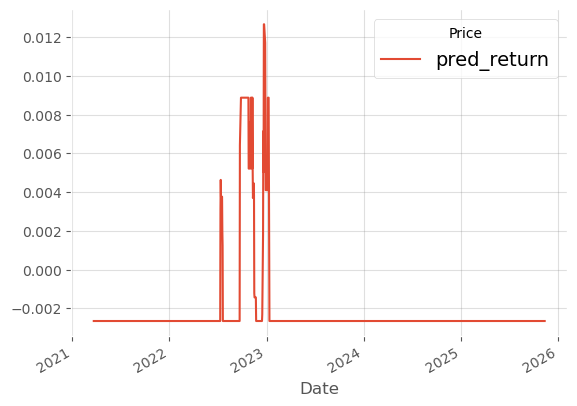

In [34]:
(
    testing_df
    [['pred_return']]
).plot()

In [35]:
testing_df['pred_return'].describe()

count    1167.000000
mean       -0.002147
std         0.002213
min        -0.002652
25%        -0.002652
50%        -0.002652
75%        -0.002652
max         0.012655
Name: pred_return, dtype: float64

In [36]:
def generate_signal_simple(df: pd.DataFrame):
    df = df.copy()
    df['signal'] = (df['pred_return'] > 0).astype(int)

    df['positions'] = df['signal'] 
    # no need to shift(1) cause we using predicted returns
    return df

In [37]:
testing_df =\
(
    generate_signal_simple(testing_df)
    .dropna()
)
testing_df

Price,actual_close,High,Low,Open,Volume,pred_return,pred_close,signal,positions
Date,,,,,,,,,
2021-03-23,3910.520020,3949.129883,3901.570068,3937.600098,4669010000,-0.002652,3900.164805,0,0
2021-03-24,3889.139893,3942.080078,3889.070068,3919.929932,4783020000,-0.002652,3878.841294,0,0
2021-03-25,3909.520020,3919.540039,3853.500000,3879.340088,4948340000,-0.002652,3899.167453,0,0
2021-03-26,3974.540039,3978.189941,3917.120117,3917.120117,5483160000,-0.002652,3964.015297,0,0
2021-03-29,3971.090088,3981.830078,3943.250000,3969.310059,4628180000,-0.002652,3960.574482,0,0
...,...,...,...,...,...,...,...,...,...
2025-11-05,6796.290039,6829.779785,6763.109863,6769.770020,5939600000,-0.002652,6778.293190,0,0
2025-11-06,6720.319824,6796.680176,6707.509766,6787.589844,6051900000,-0.002652,6702.524147,0,0
2025-11-07,6728.799805,6730.109863,6631.439941,6696.180176,5926070000,-0.002652,6710.981672,0,0


## Performance

In [38]:
def compute_cumulative_returns(df, 
                       position_column = 'positions',
                       price_column = 'Close'):
    df = df.copy()

    df["passive_returns"] =\
    (
        np
        .log(df[price_column]
            /
            df[price_column].shift(1)
            )
    )

    df['strategy_returns'] =\
    (
        df[position_column].shift(1)
        *
        df['passive_returns']
    )

    df['cum_log_returns'] =\
    (
        df['strategy_returns']
        .cumsum()
    )

    df['cumulative_returns_strategy'] =\
    (
        np.exp(
            df['cum_log_returns']
        )
    )

    df['cumulative_max_strategy'] =\
    (
        df['cumulative_returns_strategy']
        .cummax()
    )

    df['cumulative_returns_passive'] =\
    (
        np.exp(
            df['passive_returns']
            .cumsum()
        )
    )
    return df

In [39]:
testing_df =\
(
    compute_cumulative_returns(
        df = testing_df,
        position_column='positions',
        price_column = 'actual_close'
    )
)
testing_df

Price,actual_close,High,Low,Open,Volume,pred_return,pred_close,signal,positions,passive_returns,strategy_returns,cum_log_returns,cumulative_returns_strategy,cumulative_max_strategy,cumulative_returns_passive
Date,,,,,,,,,,,,,,,
2021-03-23,3910.520020,3949.129883,3901.570068,3937.600098,4669010000,-0.002652,3900.164805,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-24,3889.139893,3942.080078,3889.070068,3919.929932,4783020000,-0.002652,3878.841294,0,0,-0.005482,-0.0,0.000000,1.000000,1.000000,0.994533
2021-03-25,3909.520020,3919.540039,3853.500000,3879.340088,4948340000,-0.002652,3899.167453,0,0,0.005227,0.0,0.000000,1.000000,1.000000,0.999744
2021-03-26,3974.540039,3978.189941,3917.120117,3917.120117,5483160000,-0.002652,3964.015297,0,0,0.016494,0.0,0.000000,1.000000,1.000000,1.016371
2021-03-29,3971.090088,3981.830078,3943.250000,3969.310059,4628180000,-0.002652,3960.574482,0,0,-0.000868,-0.0,0.000000,1.000000,1.000000,1.015489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-05,6796.290039,6829.779785,6763.109863,6769.770020,5939600000,-0.002652,6778.293190,0,0,0.003647,0.0,0.157973,1.171134,1.171134,1.737950
2025-11-06,6720.319824,6796.680176,6707.509766,6787.589844,6051900000,-0.002652,6702.524147,0,0,-0.011241,-0.0,0.157973,1.171134,1.171134,1.718523
2025-11-07,6728.799805,6730.109863,6631.439941,6696.180176,5926070000,-0.002652,6710.981672,0,0,0.001261,0.0,0.157973,1.171134,1.171134,1.720692


<Axes: xlabel='Date'>

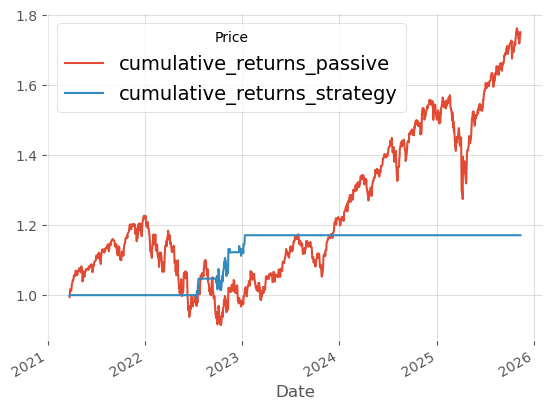

In [40]:
(
    testing_df
    [['cumulative_returns_passive', 'cumulative_returns_strategy']]
).plot()

In [41]:
print(f"Cumulative Returns (Passive): {testing_df['cumulative_returns_passive'].iloc[-1]:.2f}")
print(f"Cumulative Returns (Strategy): {testing_df['cumulative_returns_strategy'].iloc[-1]:.2f}")

Cumulative Returns (Passive): 1.75
Cumulative Returns (Strategy): 1.17


In [42]:
testing_df.head(1)

Price,actual_close,High,Low,Open,Volume,pred_return,pred_close,signal,positions,passive_returns,strategy_returns,cum_log_returns,cumulative_returns_strategy,cumulative_max_strategy,cumulative_returns_passive
Date,,,,,,,,,,,,,,,
2021-03-23,3910.52002,3949.129883,3901.570068,3937.600098,4669010000,-0.002652,3900.164805,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## Performance Metrics

In [43]:
passive_metrics=\
(
    compute_performance_metrics(
        log_returns=testing_df['passive_returns'],
        initial_capital=100_000,
        strategy='passive'
    )
).T

passive_metrics

,passive
CAGR,0.128
Volatility,0.171
Max Drawdown,0.254
Sharpe Ratio,0.792
Sortino Ratio,1.299
Calmar Ratio,0.505
Final Portfolio Value,175081.826
Cumulative Return,1.751


In [44]:
strategy_metrics =\
(
    compute_performance_metrics(
        log_returns=testing_df['strategy_returns'],
        initial_capital=100_000
    )
).T

strategy_metrics

,ML
CAGR,0.035
Volatility,0.058
Max Drawdown,0.056
Sharpe Ratio,0.613
Sortino Ratio,1.151
Calmar Ratio,0.614
Final Portfolio Value,117113.447
Cumulative Return,1.171


In [45]:
summary_stats=\
(
    pd.concat(
        [strategy_metrics, passive_metrics],
        axis=1
    )
)

print(summary_stats)

                               ML     passive
CAGR                        0.035       0.128
Volatility                  0.058       0.171
Max Drawdown                0.056       0.254
Sharpe Ratio                0.613       0.792
Sortino Ratio               1.151       1.299
Calmar Ratio                0.614       0.505
Final Portfolio Value  117113.447  175081.826
Cumulative Return           1.171       1.751


In [48]:
testing_df['pred_close'].to_csv("data/predicted_spy_close.csv")